# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import seaborn as sns

# **Load the Dataset**

In [2]:
#Step 1: Load and Preprocess the Iris dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df= pd.read_csv(url, header=None, names=columns)

# **Data Splitting**

In [3]:
#Step 2: Encode the target variable (species) into numerical format
df['species'] = df['species'].astype('category').cat.codes

#Split the features and target
X = df.drop('species', axis=1)
y = df['species']

# **Normalization:**

In [4]:
#Step 3: Normalize the data
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# **Multiclass Classification**

In [7]:
#Step 5: Apply Multiclass Logistic Regression
model=OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200))
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200))

# **Model Prediction**

In [10]:
#Step 6: Predict the testing data
y_pred = model.predict(X_test)

# **Model Evaluation:**

In [11]:
#Step 7: Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45

Confusion Matrix:
 [[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]
Accuracy Score:  0.9111111111111111


# **Calculate AUC ROC Score**

In [12]:
#Step 8: Calculate ROC AUC score
y_bin =label_binarize(y, classes=[0, 1, 2])
y_test_bin= label_binarize(y_test, classes=[0, 1, 2])
y_score= model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
   fpr[i], tpr[i],_=roc_curve(y_test_bin[:, i], y_score[:, i])
   roc_auc[i]= auc(fpr[i], tpr[i])

# **Plot the ROC**

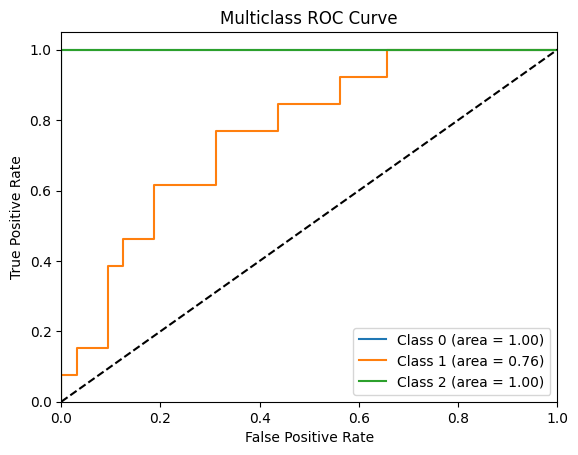

In [13]:
#Plot ROC Curve
for i in range(3):
   plt.plot(fpr[i], tpr[i], label=f"Class {i} (area = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

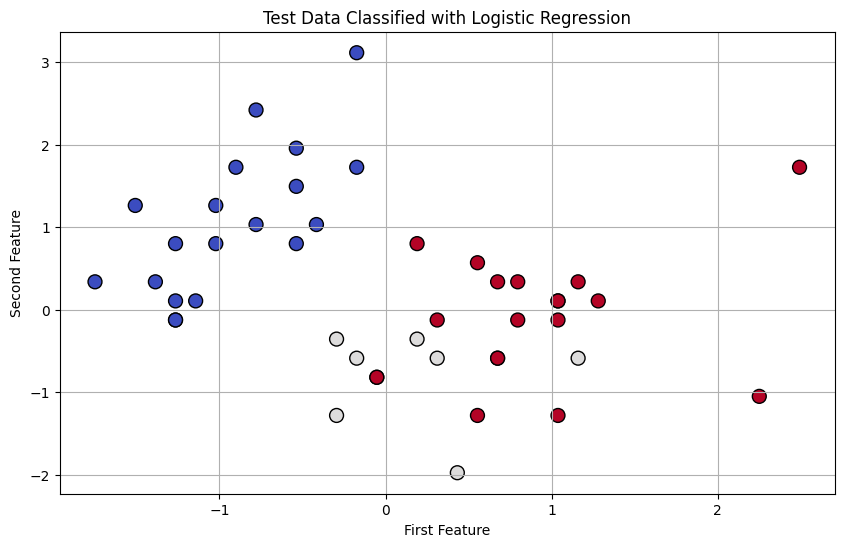

In [14]:
#Step 9: Visualize the data and classification decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', s=100, edgecolors='k')
plt.title("Test Data Classified with Logistic Regression")
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.grid(True)
plt.show()

# **Confusion Matrix**

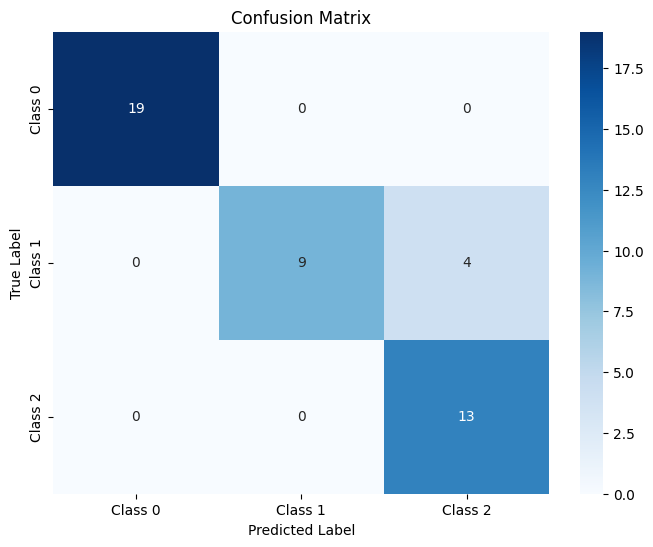

In [15]:
#Step 10: Assuming you have true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)
#Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'],
yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show() #heat map

In [16]:
#Step 11: Create a loop for predicting new records
while True:
    user_input = input("Would you like to predict a new record? (y/n): ")
    if user_input.lower() == 'n':
        print("Exiting the prediction loop.")
        break
    elif user_input.lower() == 'y':
        try:
            sepal_length = float(input("Enter Sepal Length: "))
            sepal_width = float(input("Enter Sepal Width: "))
            petal_length = float(input("Enter Petal Length: "))
            petal_width = float(input("Enter Petal Width: "))

            # Convert input to DataFrame for compatibility with StandardScaler
            new_data = pd.DataFrame(
                [[sepal_length, sepal_width, petal_length, petal_width]],
                columns=columns[:-1]
            )

            # Normalize the new input
            new_data_scaled = scaler.transform(new_data)
            prediction = model.predict(new_data_scaled)

            print(f"Predicted class: {prediction[0]} (0: setosa, 1: versicolor, 2: virginica)")

        except ValueError:
            print("Invalid input. Please enter numeric values.")


Would you like to predict a new record? (y/n):  y
Enter Sepal Length:  1.5
Enter Sepal Width:  2
Enter Petal Length:  4
Enter Petal Width:  7


Predicted class: 2 (0: setosa, 1: versicolor, 2: virginica)


Would you like to predict a new record? (y/n):  y
Enter Sepal Length:  2.9
Enter Sepal Width:  4.7
Enter Petal Length:  1.5
Enter Petal Width:  8.3


Predicted class: 2 (0: setosa, 1: versicolor, 2: virginica)


Would you like to predict a new record? (y/n):  2
Would you like to predict a new record? (y/n):  y
Enter Sepal Length:  2
Enter Sepal Width:  6
Enter Petal Length:  9
Enter Petal Width:  1


Predicted class: 0 (0: setosa, 1: versicolor, 2: virginica)


Would you like to predict a new record? (y/n):  n


Exiting the prediction loop.


# **Save the Model:**

In [17]:
import joblib

joblib.dump(model, "iris_model.pkl")

['iris_model.pkl']